**Unveiling the Balance in Gender Representation in the Movie Industry**

PROJECT - MILESTONE 2

TODO: ADD THE SUMMARY OF OUR GOAL

Load the CMU movie dataset

In this project, our main dataset is CMU movie dataset which is taken from https://www.cs.cmu.edu/~ark/personas/. All of the data taken from the website is collected under /dataset folder in the project.


In [2]:
folder_path=".\dataset"
character_metadata= folder_path+"\character.metadata.tsv"
movie_metadata= folder_path+ "\movie.metadata.tsv"

In [154]:
import json
import ast  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns

In [25]:
character_df=pd.read_csv("dataset/character.metadata.tsv",sep="\t",names=[
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
])
movie_df=pd.read_csv("dataset/movie.metadata.tsv",sep="\t",names=["Wikipedia movie ID",
                                                                "Freebase movie ID",
                                                                "Movie name",
                                                                "Movie release date",
                                                                "Movie box office revenue",
                                                                "Movie runtime",
                                                                "Movie languages",
                                                                "Movie countries",
                                                                "Movie genres"])


# Read tvtropes.clusters.txt and create a dataframe
tvtropes_data = pd.read_csv(folder_path+'\\tvtropes.clusters.txt', sep='\t', header=None)
tvtropes_data.columns = ['Character Type', 'Info']

# Read name.clusters.txt and create a dataframe
name_data = pd.read_csv(folder_path+'\\name.clusters.txt', sep='\t', header=None)
name_data.columns = ['Character Name', 'ID']


# Read plot_summaries.txt and create a dataframe
summary_data = pd.read_csv(folder_path+'\\plot_summaries.txt', sep='\t', header=None)
summary_data.columns = ['ID', 'summary']

Preprocessing for Character Metadata

In [26]:
character_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [27]:
# we wont use Freebase character/actor map ID, Freebase character ID, Freebase actor ID, so they are dropped
character_df = character_df.drop(['Freebase character ID', 'Freebase actor ID'], axis=1)

In [88]:
character_df['Movie release year'] = character_df['Movie release date'].str[:4]

Preprocessing for Movie Metadata

In [28]:
movie_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [29]:
# convert the json parts into list of values (since we wont use the freebase ids)
def extract_values(str_list):
    return [list(ast.literal_eval(d).values()) if isinstance(d, str) else [] for d in str_list]


# Apply the function to the specific columns
movie_df['Movie languages'] = extract_values(movie_df['Movie languages'])
movie_df['Movie countries'] = extract_values(movie_df['Movie countries'])
movie_df['Movie genres'] = extract_values(movie_df['Movie genres'])


#first 4 characters from each release date - only year
movie_df['Movie release year'] = movie_df['Movie release date'].str[:4]

In [30]:
movie_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983


Preprocess for TvTropes data

In [31]:
tvtropes_data.head()

,Character Type,Info
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [32]:
# open the values in Info section of tvtropes
tvtropes_data = pd.concat([tvtropes_data['Character Type'], tvtropes_data['Info'].apply(lambda x: pd.Series(json.loads(x)))], axis=1)
tvtropes_data.head()

,Character Type,char,movie,id,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


Preprocessing for Name and Summary data 

In [33]:
name_data.head()

,Character Name,ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [34]:
# change the naming for consistency
name_data = name_data.rename(columns={'ID': 'Freebase character/actor map ID'})

In [35]:
summary_data.head()

,ID,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [38]:
# change the naming for consistency
summary_data = summary_data.rename(columns={'ID': 'Wikipedia movie ID'})

**Data Analysis over the existing datasets**

General Analysis:
    
In this section, we have focused on analyzing the general aspect of the movie data rather than only focusing the gender.
1) Missing Data Analysis
2) Number of Movies Released Over 5 Year Intervals
3) The Movie Distribution for Popular Regions of the Films

Missing Data Analysis

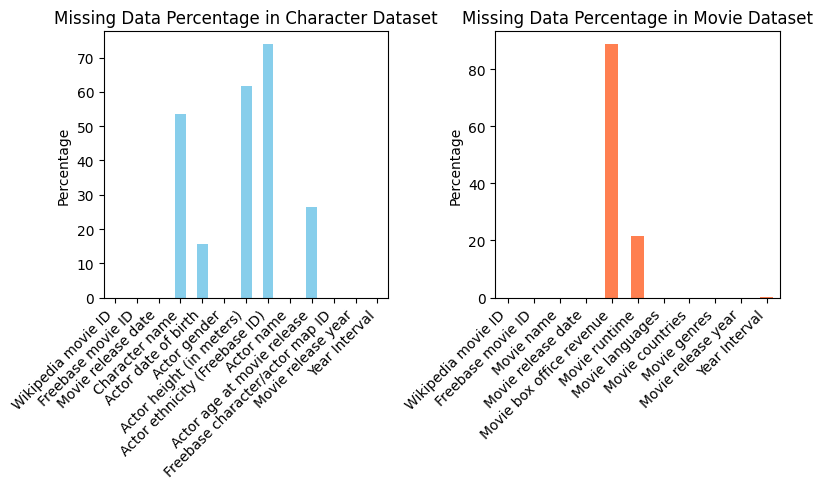

In [63]:
#evaluate the missing values for each dataset
missing_percentage_character_df = (character_df.isnull().sum() / len(character_df)) * 100
missing_percentage_movie_df = (movie_df.isnull().sum() / len(movie_df)) * 100

# Creating bar charts for each DataFrame
plt.figure(figsize=(8, 5))

# Character DataFrame missing values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
missing_percentage_character_df.plot(kind='bar', color='skyblue')
plt.title('Missing Data Percentage in Character Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Movie DataFrame missing values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
missing_percentage_movie_df.plot(kind='bar', color='coral')
plt.title('Missing Data Percentage in Movie Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjusts the plots to prevent overlap
plt.show()


Number of Movies Released Over 5 Year Intervals

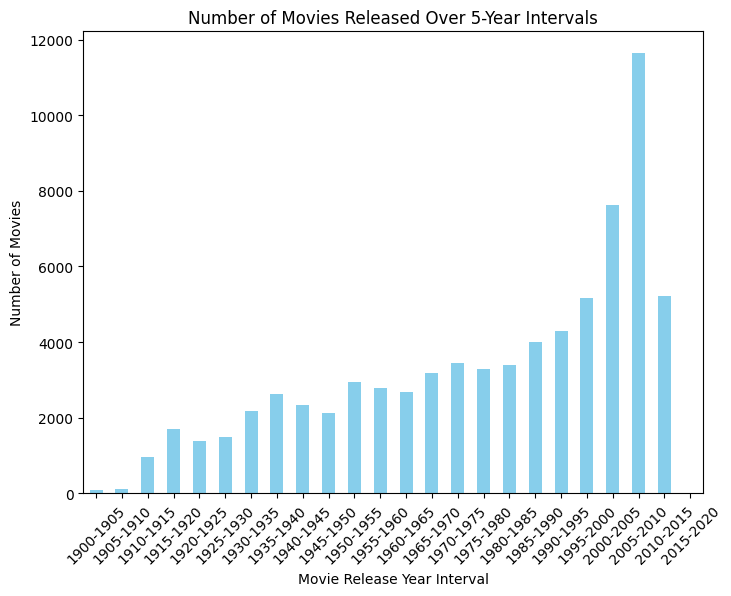

In [61]:
movie_df['Movie release year'] = pd.to_numeric(movie_df['Movie release year'], errors='coerce')
movie_df = movie_df.dropna(subset=['Movie release year'])

movie_df['Movie release year'] = movie_df['Movie release year'].astype(int)
min_year = 1900  # before that there are less number of movies, discarded.
max_year = movie_df['Movie release year'].max()
year_bins = np.arange(min_year, max_year + 5, 5)
year_labels = [f'{int(y)}-{int(y+5)}' for y in year_bins[:-1]]

# Categorize each row into a 20-year interval
movie_df['Year Interval'] = pd.cut(movie_df['Movie release year'], bins=year_bins, labels=year_labels, right=False)
movies_over_intervals = movie_df.groupby('Year Interval').size()

plt.figure(figsize=(8, 6))
movies_over_intervals.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Over 5-Year Intervals')
plt.xlabel('Movie Release Year Interval')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [66]:
movie_df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Year Interval
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,2000-2005
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000,2000-2005
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,1985-1990
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,1985-1990
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983,1980-1985
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama],2011,2010-2015
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011,2010-2015
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",1972,1970-1975
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",1992,1990-1995


The Movie Distribution for Popular Regions of the Films

In [78]:
countries_series = pd.Series([countries for sublist in movie_df["Movie countries"] for countries in sublist])
countries_count = countries_series.value_counts()
countries_count

United States of America    33197
India                        7764
United Kingdom               7452
France                       4199
Italy                        3017
                            ...  
Republic of China               1
Macau                           1
Palestinian Territories         1
German Language                 1
Ukranian SSR                    1
Name: count, Length: 146, dtype: int64

In [80]:
num_languages_above_threshold = (countries_count >= 1500).sum()
num_languages_below_threshold = (countries_count < 1500).sum()

print(f"There are {len(countries_count)} countries, but {num_languages_below_threshold} of them only have less than 1500 countries.")


There are 146 countries, but 138 of them only have less than 1500 countries.


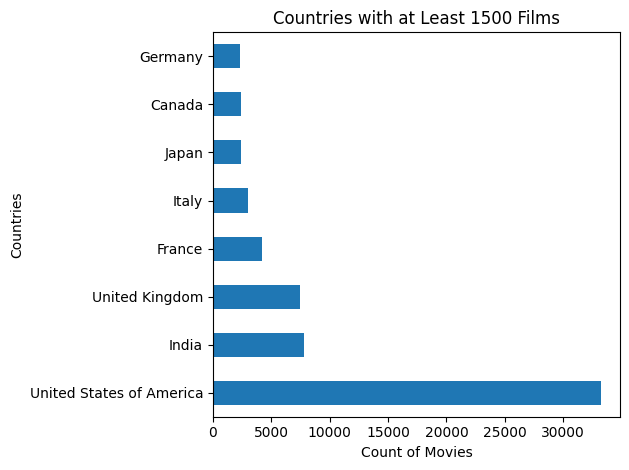

In [84]:
threshold = 1500

significant_countries_count = countries_count[countries_count >= threshold]

ax = significant_countries_count.plot(kind="barh")  
ax.set(xlabel="Count of Movies", ylabel="Countries")
ax.set_title(f"Countries with at Least {threshold} Films")
plt.tight_layout() 
plt.show()

**Gender Based Analysis Based on CMU Movie Dataset**

Gender Distributions over Years

In [97]:
character_df['Movie release year'] = pd.to_numeric(character_df['Movie release year'], errors='coerce')
character_df = character_df.dropna(subset=['Movie release year'])

character_df['Movie release year'] = character_df['Movie release year'].astype(int)
min_year = 1900  # before that there are less number of movies, discarded.
max_year = character_df['Movie release year'].max()
year_bins = np.arange(min_year, max_year + 10, 10)
year_labels = [f'{int(y)}-{int(y+10)}' for y in year_bins[:-1]]

# Categorize each row into a 20-year interval
character_df['Year Interval'] = pd.cut(character_df['Movie release year'], bins=year_bins, labels=year_labels, right=False)
gender_distribution_over_time = character_df.groupby(['Year Interval', 'Actor gender']).size().unstack()

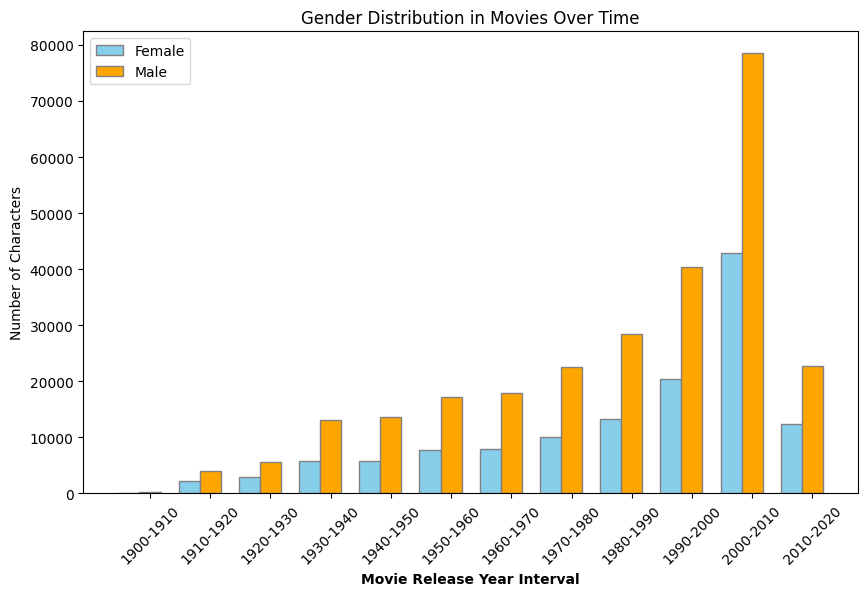

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(gender_distribution_over_time))
r2 = [x + bar_width for x in r1]

# Make the plot
ax.bar(r1, gender_distribution_over_time['F'], color='skyblue', width=bar_width, edgecolor='grey', label='Female')
ax.bar(r2, gender_distribution_over_time['M'], color='orange', width=bar_width, edgecolor='grey', label='Male')

# Add xticks on the middle of the group bars
ax.set_xlabel('Movie Release Year Interval', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(gender_distribution_over_time))])
ax.set_xticklabels(gender_distribution_over_time.index)
ax.set_ylabel('Number of Characters')
ax.set_title('Gender Distribution in Movies Over Time')

# Create legend & Show graphic
ax.legend()
plt.xticks(rotation=45)
plt.show()

Gender Distribution in Top 20 Movie Genres

In [100]:
merged_df = pd.merge(
    movie_df,
    character_df,
    on=['Wikipedia movie ID', 'Freebase movie ID'],
    how='left',  
    suffixes=('_movie', '_character')  
)


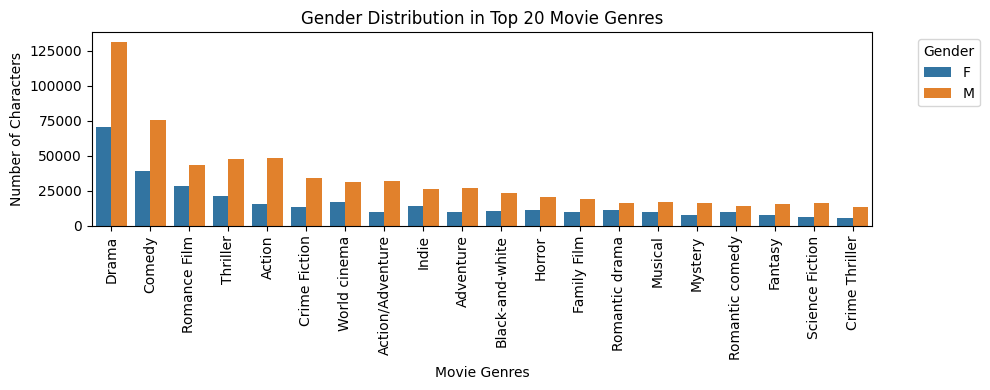

In [116]:
merged_df['Movie genres'] = merged_df['Movie genres'].apply(lambda x: x if isinstance(x, list) else [])
genre_gender_df = merged_df.explode('Movie genres')
genre_gender_distribution = genre_gender_df.groupby(['Movie genres', 'Actor gender']).size().unstack().fillna(0)

top_n = 20
top_genres = genre_gender_distribution.sum(axis=1).nlargest(top_n).index

top_genre_gender_distribution = genre_gender_distribution.loc[top_genres]

top_genre_gender_distribution = top_genre_gender_distribution.stack().reset_index()
top_genre_gender_distribution.columns = ['Movie genres', 'Actor gender', 'Number of Characters']

plt.figure(figsize=(10, 4))
sns.barplot(x='Movie genres', y='Number of Characters', hue='Actor gender', data=top_genre_gender_distribution)
plt.title('Gender Distribution in Top 20 Movie Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Number of Characters')
plt.xticks(rotation=90)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Actor Age at Movie Release based on Genders

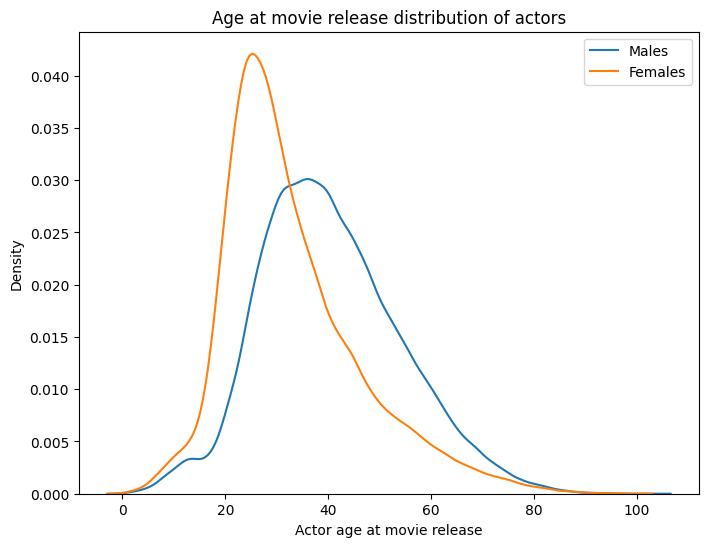

In [124]:
char_male= character_df[character_df['Actor gender'] == 'M']
char_female = character_df[character_df['Actor gender'] == 'F']
def age_kde(char_df, gender):
    char_df_tmp = char_df.dropna(subset=['Actor age at movie release']).sort_values(by=['Actor age at movie release'])
    char_df_tmp = char_df_tmp[char_df_tmp['Actor age at movie release'] > 0]
    sns.kdeplot(char_df_tmp['Actor age at movie release'], label=gender)

plt.figure(figsize=(8, 6))

age_kde(char_male, 'Males')
age_kde(char_female, 'Females')

plt.xlabel('Actor age at movie release')
plt.title('Age at movie release distribution of actors')
plt.legend()
plt.show()



In [140]:
character_count = character_df.groupby('Wikipedia movie ID')['Actor gender'].value_counts().unstack().fillna(0)
character_count['Total Characters'] = character_count['M'] + character_count['F']

top_n = 20 # Top 100 grossing films
top_movies = movie_df.nlargest(top_n, 'Movie box office revenue')

top_movies = pd.merge(
    top_movies,
    character_count,
    on=['Wikipedia movie ID'],
    how='left',  
    suffixes=('_top_movies', '_character_count')  
)
top_movies.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Year Interval,F,M,Total Characters
0,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"[English Language, Spanish Language]","[United States of America, United Kingdom]","[Thriller, Science Fiction, Adventure, Compute...",2009,2005-2010,4.0,10.0,14.0
1,52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"[Italian Language, English Language, French La...",[United States of America],"[Tragedy, Costume drama, Historical fiction, A...",1997,1995-2000,5.0,17.0,22.0
2,22114132,/m/062zm5h,The Avengers,2012-04-11,1.511758e+09,137.0,"[Russian Language, English Language]",[United States of America],"[Science Fiction, Action]",2012,2010-2015,8.0,19.0,27.0
3,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09,130.0,[English Language],"[United States of America, United Kingdom]","[Drama, Mystery, Fantasy, Adventure]",2011,2010-2015,21.0,30.0,51.0
4,25001260,/m/0872p_c,Transformers: Dark of the Moon,2011-06-23,1.123747e+09,157.0,[English Language],[United States of America],"[Alien Film, Science Fiction, Action, Adventure]",2011,2010-2015,3.0,22.0,25.0


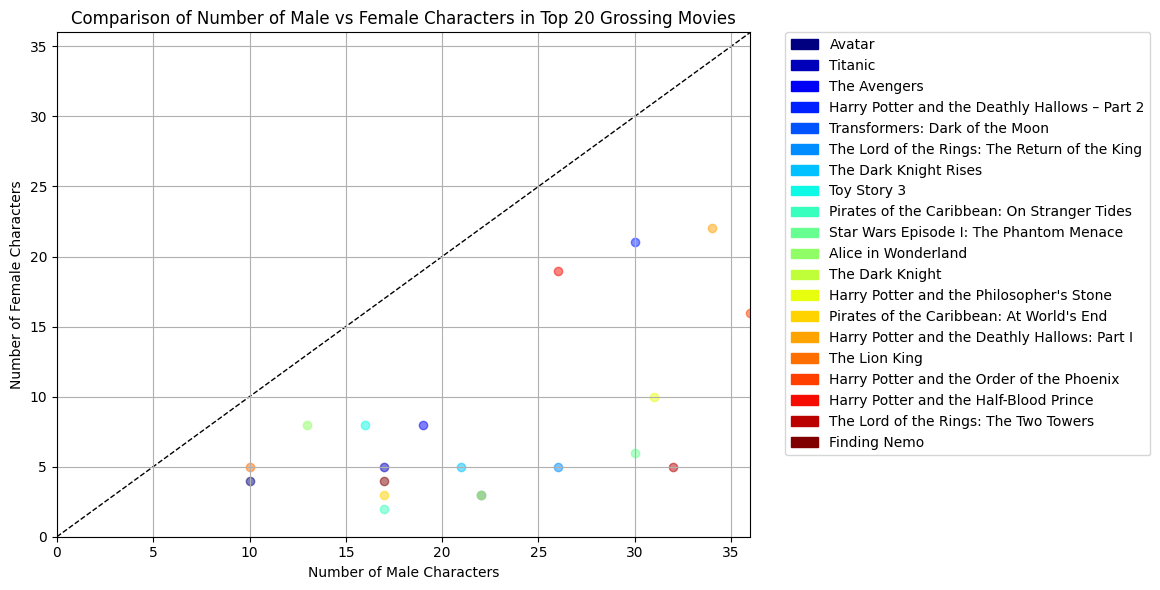

In [159]:
top_20_movies = top_movies.head(20)
colors = plt.cm.jet(np.linspace(0, 1, len(top_20_movies)))

max_num_characters = max(top_20_movies['M'].max(), top_20_movies['F'].max())

plt.figure(figsize=(14, 6))
for i, (index, row) in enumerate(top_20_movies.iterrows()):
    plt.scatter(row['M'], row['F'], color=colors[i], alpha=0.5)

# Setting the same scale for both axes
plt.xlim(0, max_num_characters)
plt.ylim(0, max_num_characters)

plt.plot([0, max_num_characters], [0, max_num_characters], 'k--', lw=1, zorder=0)

plt.xlabel('Number of Male Characters')
plt.ylabel('Number of Female Characters')
plt.title('Comparison of Number of Male vs Female Characters in Top 20 Grossing Movies')
plt.grid(True)

# Creating a custom legend
legend_patches = [mpatches.Patch(color=colors[i], label=row['Movie name']) for i, row in top_20_movies.iterrows()]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjusting the layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()


In [133]:
top_n = 2 # Example: Top 100 grossing films
top_movies = movie_df.nlargest(top_n, 'Movie box office revenue')